In [124]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing as pp
from sklearn.metrics import f1_score, mean_absolute_error,mean_squared_error , median_absolute_error, accuracy_score
from sklearn.metrics import max_error

In [125]:
df = pd.read_csv("iscxIDS2012_subset_no_payload.csv")

In [126]:
df

,Tag,appName,destination,destinationPort,destinationTCPFlagsDescription,direction,protocolName,source,sourceFile,sourcePort,sourceTCPFlagsDescription,startDateTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,3870,S,2010-06-13T23:59:17,2010-06-14T00:00:50,0,0,990,15
1,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,3934,S,2010-06-14T00:59:17,2010-06-14T01:00:50,0,0,990,15
2,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,3967,S,2010-06-14T01:59:17,2010-06-14T02:00:50,0,0,990,15
3,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,4000,S,2010-06-14T02:59:17,2010-06-14T03:00:50,0,0,990,15
4,Attack,SSH,192.168.5.122,22,"S,A",R2L,tcp_ip,218.108.130.167,TestbedMonJun14Flows.xml,51693,"S,R",2010-06-14T03:42:58,2010-06-14T03:42:59,66,1,130,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137815,Normal,HTTPWeb,110.54.110.235,80,"F,S,P,A",L2R,tcp_ip,192.168.1.103,TestbedWedJun16-3Flows.xml,4455,"F,S,P,A",2010-06-16T19:05:03,2010-06-16T19:05:05,5542,7,511,7
137816,Normal,HTTPImageTransfer,72.246.31.18,80,"F,A",L2R,tcp_ip,192.168.4.121,TestbedThuJun17-2Flows.xml,55630,"F,A",2010-06-17T12:11:29,2010-06-17T12:13:15,64,1,128,2
137817,Normal,HTTPImageTransfer,72.11.132.253,80,"F,S,P,A",L2R,tcp_ip,192.168.3.116,TestbedMonJun14Flows.xml,2344,"S,P,A",2010-06-14T15:06:26,2010-06-14T15:06:32,25603,22,1316,18
137818,Normal,DNS,198.164.30.2,53,-,L2R,udp_ip,192.168.5.122,TestbedTueJun15-1Flows.xml,36475,-,2010-06-15T09:20:41,2010-06-15T09:20:41,430,1,92,1


In [127]:
# drop destinationPayloadAsBase64 , destinationPayloadAsUTF, sourcePayloadAsUTF (encrypted) so useless
# Features : appName, destination, destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId?, sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets


In [128]:
for col in df:
  print(df[col].unique())

['Attack' 'Normal']
['Unknown_TCP' 'SSH' 'SecureWeb' 'ICMP' 'HTTPWeb' 'AOL-ICQ' 'Oracle'
 'MiscApplication' 'MSMQ' 'Authentication' 'IRC' 'Filenet' 'Groove'
 'Hotline' 'Real' 'Misc-DB' 'Timbuktu' 'Google' 'OpenNap' 'Yahoo'
 'Misc-Ports' 'ManagementServices' 'Anet' 'XWindows' 'LDAP' 'Flowgen'
 'Squid' 'SNMP-Ports' 'MiscApp' 'NETBEUI' 'Misc-Mail-Port' 'Tacacs' 'MDQS'
 'SMS' 'Hosts2-Ns' 'TimeServer' 'MS-SQL' 'BitTorrent' 'NortonAntiVirus'
 'MSN' 'rexec' 'Network-Config-Ports' 'MicrosoftMediaServer'
 'StreamingAudio' 'Citrix' 'SMTP' 'IPSec' 'NNTPNews' 'Telnet' 'H.323'
 'PostgreSQL' 'rlogin' 'SSL-Shell' 'PCAnywhere' 'Webmin' 'FTP'
 'MSTerminalServices' 'IMAP' 'dsp3270' 'Gnutella' 'Printer' 'Intellex'
 'Ingres' 'rsh' 'POP' 'PPTP' 'WindowsFileSharing' 'SunRPC' 'RPC' 'RTSP'
 'NetBIOS-IP' 'VNC' 'DNS' 'XFER' 'POP-port' 'Common-P2P-Port' 'BGP' 'NFS'
 'HTTPImageTransfer' 'Unknown_UDP' 'WebMediaDocuments' 'WebMediaVideo'
 'NortonGhost' 'WebFileTransfer' 'GuptaSQLBase' 'Web-Port' 'IGMP'
 'Common-Por

In [129]:
from sklearn.preprocessing import OrdinalEncoder

In [130]:
replace_tag = {'Tag': {'Normal': 0, 'Attack': 1}}
replace_tag

{'Tag': {'Normal': 0, 'Attack': 1}}

In [131]:
df = df.replace(replace_tag)
df.Tag.value_counts()

1    68910
0    68910
Name: Tag, dtype: int64

comments
replace_appName = {'appName': {'Unknown_TCP':0, 'SSH':1, 'SecureWeb':2, 'ICMP':3, 'HTTPWeb':4, 'AOL-ICQ':5, 'Oracle':6, 
 'MiscApplication':7, 'MSMQ':8, 'Authentication':9, 'IRC':10, 'Filenet':11, 'Groove':12,
 'Hotline':13, 'Real':14, 'Misc-DB':15, 'Timbuktu':16, 'Google':17, 'OpenNap':18, 'Yahoo':19,
 'Misc-Ports':20, 'ManagementServices':21, 'Anet':22, 'XWindows':23, 'LDAP':24, 'Flowgen':25,
 'Squid':26, 'SNMP-Ports':27, 'MiscApp':28, 'NETBEUI':29, 'Misc-Mail-Port':30, 'Tacacs':31, 'MDQS':32,
 'SMS':33, 'Hosts2-Ns':34, 'TimeServer':35, 'MS-SQL':36, 'BitTorrent':37, 'NortonAntiVirus':38,
 'MSN':39, 'rexec':40, 'Network-Config-Ports':41, 'MicrosoftMediaServer':42,
 'StreamingAudio':43, 'Citrix':44, 'SMTP':45, 'IPSec':46, 'NNTPNews':47, 'Telnet':48, 'H.323':49,
 'PostgreSQL':50, 'rlogin':51, 'SSL-Shell':52, 'PCAnywhere':53, 'Webmin':54, 'FTP':55,
 'MSTerminalServices':56, 'IMAP':57, 'dsp3270':58, 'Gnutella':59, 'Printer':60, 'Intellex':61,
 'Ingres':62, 'rsh':63, 'POP':64, 'PPTP':65, 'WindowsFileSharing':66, 'SunRPC' :67,'RPC':68, 'RTSP':69,
 'NetBIOS-IP':70, 'VNC':71, 'DNS':72, 'XFER':73, 'POP-port':74, 'Common-P2P-Port':75, 'BGP':76, 'NFS':77,
 'HTTPImageTransfer':78, 'Unknown_UDP':79, 'WebMediaDocuments':80, 'WebMediaVideo':81,
 'NortonGhost':82, 'WebFileTransfer':83, 'GuptaSQLBase':84, 'Web-Port':85, 'IGMP':86,
 'Common-Ports':87, 'DNS-Port':87, 'giop-ssl':88, 'iChat':89, 'WebMediaAudio':90, 'MSN-Zone':91,
 'SSDP':92, 'OpenWindows':93}}

In [132]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transformed_data = df.copy()

for col in transformed_data.columns:
    if transformed_data[col].dtype == 'object':
        transformed_data[col] = le.fit_transform(transformed_data[col].values)
transformed_data.head(10)

,Tag,appName,destination,destinationPort,destinationTCPFlagsDescription,direction,protocolName,source,sourceFile,sourcePort,sourceTCPFlagsDescription,startDateTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,1,76,554,5555,0,1,3,71,0,3870,17,13358,13617,0,0,990,15
1,1,76,554,5555,0,1,3,71,0,3934,17,13484,13734,0,0,990,15
2,1,76,554,5555,0,1,3,71,0,3967,17,13655,13911,0,0,990,15
3,1,76,554,5555,0,1,3,71,0,4000,17,13903,14161,0,0,990,15
4,1,66,1411,22,17,2,3,137,0,51693,20,14046,14299,66,1,130,2
5,1,66,1411,22,7,2,3,137,0,54053,11,14069,14325,2651,14,1304,12
6,1,76,554,5555,0,1,3,71,0,4039,17,14075,14333,0,0,990,15
7,1,76,554,5555,0,1,3,71,0,4558,17,14333,14601,0,0,990,15
8,1,76,554,5555,0,1,3,71,0,1562,17,14720,14983,0,0,990,15
9,1,76,554,5555,0,1,3,71,0,2030,17,15069,15327,0,0,990,15


In [133]:
transformed_data.appName.value_counts()

19    64454
18    24796
76    14989
8     10930
66     7498
      ...  
49        1
91        1
90        1
16        1
51        1
Name: appName, Length: 95, dtype: int64

In [134]:
transformed_data.Tag.value_counts()

1    68910
0    68910
Name: Tag, dtype: int64

In [135]:
x = transformed_data.drop(['Tag'], axis=1).copy()
y = transformed_data["Tag"]

In [136]:
x_train,x_test,y_train,y_test = tts(x,y, test_size=.4,random_state=0)

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [138]:
clf = DecisionTreeClassifier(random_state=0)
score = cross_val_score(clf, x, y, cv=10)
score.mean()
#score.std()

0.9268756348860834

In [139]:
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5028611771700356, 0.9772727272727273, 'X[4] <= 0.5\ngini = 0.5\nsamples = 137820\nvalue = [68910, 68910]'),
 Text(0.24843935790725327, 0.9318181818181818, 'X[9] <= 7.5\ngini = 0.188\nsamples = 67724\nvalue = [7104, 60620]'),
 Text(0.13317479191438764, 0.8863636363636364, 'X[5] <= 3.5\ngini = 0.293\nsamples = 5732\nvalue = [4712, 1020]'),
 Text(0.08561236623067776, 0.8409090909090909, 'X[3] <= 3.5\ngini = 0.494\nsamples = 2207\nvalue = [1227, 980]'),
 Text(0.04756242568370987, 0.7954545454545454, 'X[10] <= 35333.0\ngini = 0.035\nsamples = 957\nvalue = [17, 940]'),
 Text(0.03804994054696789, 0.75, 'X[0] <= 18.5\ngini = 0.015\nsamples = 947\nvalue = [7, 940]'),
 Text(0.019024970273483946, 0.7045454545454546, 'X[1] <= 1333.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.009512485136741973, 0.6590909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.028537455410225922, 0.6590909090909091, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.057074910820451845, 0.7

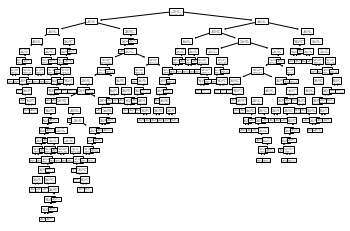

In [140]:
clf = clf.fit(x, y)
tree.plot_tree(clf)


In [141]:
clf.fit(x_train,y_train)
pred_test = clf.predict(x_test)
test_f2 = f1_score(y_test,pred_test)
test_mar = mean_absolute_error(y_test, pred_test)

print("Test f1 score: {}".format(test_f2))
print("Test mean absolute error: {}".format(test_mar))

Test f1 score: 0.9993273094194862
Test mean absolute error: 0.0006711652880568858


In [142]:
#accuracy = accuracy_score(y_test,pred_test)
#accuracy

In [143]:
from sklearn.linear_model import LogisticRegression


In [144]:
LR = LogisticRegression(random_state=0).fit(x, y)
LR.score(x, y)

C:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8530619648817298

In [145]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 55128 points : 17265


In [146]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [147]:
#Challege 2
x2 = transformed_data.drop(['appName'], axis=1).copy()
y2 = transformed_data["appName"]

In [148]:
X_train,X_test,Y_train,Y_test = tts(x2,y2, test_size=.4,random_state=0)
clf2 = DecisionTreeClassifier()


In [150]:
clf2.fit(X_train,Y_train)
pred_test2 = clf2.predict(X_test)



In [152]:
test_f22 = f1_score(Y_test,pred_test2,average='micro')
test_mar2 = mean_absolute_error(Y_test, pred_test2)

print("Test f1 score: {}".format(test_f22))
print("Test mean absolute error: {}".format(test_mar))

Test f1 score: 0.9141634015382383
Test mean absolute error: 0.0006711652880568858


In [155]:
score2 = cross_val_score(clf2, x2, y2, cv=10)
score2

C:\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([0.90632709, 0.95385285, 0.94855609, 0.95559425, 0.95711798,
       0.95914962, 0.85125526, 0.85466551, 0.84886083, 0.80822812])

In [156]:
score2.mean()

0.9043607604121318